In [1]:
# import some library
import collections
# import hashlib
import math
import os
import random
import re
# import shutil
import sys
import tarfile
import time
import zipfile
from collections import defaultdict
import pandas as pd
import requests
from IPython import display
from matplotlib import pyplot as plt
# from matplotlib_inline import backend_inline

In [2]:
import numpy as np
import torch

In [3]:
import torchvision
from PIL import Image
from torch import nn
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms

In [4]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [5]:
print("Hello World!")

Hello World!


In [112]:
n = 12
x = torch.arange(n)
print(x)
print(x.shape)
print(x.numel())

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
12


In [114]:
X = x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [7]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [9]:
torch.randn(3,4)

tensor([[ 1.6027, -0.8033, -1.0099, -0.5769],
        [ 0.3796, -0.3732,  1.2001,  0.5583],
        [-0.7289, -0.1637,  0.2813,  0.1131]])

In [23]:
# list to tensor
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]], dtype = int)

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [12]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2 ,2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [13]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [24]:
# concatenation
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [32]:
X.to(torch.float64)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

In [15]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [16]:
X.sum()

tensor(66.)

In [33]:
# add with different shape
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1,2))
a, b, a+b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

In [19]:
# indexing
X[-1], X[1:3,]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [20]:
X[1,2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [21]:
X[0:2,:] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [40]:
# saving memory
before = id(Y)
Y = Y + X
id(Y) == before

False

In [24]:
before = id(Y)
Y += X
id(Y) == before

True

In [25]:
# change type
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [27]:
# get scalar
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [ ]:
# Read Data

In [43]:
os.makedirs("./chpdata", exist_ok = True)

In [44]:
data_file = './chpdata/house_tiny.csv'
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # 列名
    f.write('NA,Pave,127500\n') # 每⾏表⽰⼀个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [45]:
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [49]:
# deal with NaN
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())

C:\Users\fdsm\AppData\Local\Temp\ipykernel_12080\4212450610.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inputs = inputs.fillna(inputs.mean())


In [50]:
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [51]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [52]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [ ]:
# linear algebra

In [39]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [40]:
# vector
x = torch.arange(4)
x, len(x), x.shape

(tensor([0, 1, 2, 3]), 4, torch.Size([4]))

In [4]:
# matrix
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [10]:
torch.softmax(A.float(), dim=1)

tensor([[0.0321, 0.0871, 0.2369, 0.6439],
        [0.0321, 0.0871, 0.2369, 0.6439],
        [0.0321, 0.0871, 0.2369, 0.6439],
        [0.0321, 0.0871, 0.2369, 0.6439],
        [0.0321, 0.0871, 0.2369, 0.6439]])

In [42]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [43]:
# symmetric matrix
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [12]:
# high-order tensor
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [14]:
X.sum(axis = 1)

tensor([[12, 15, 18, 21],
        [48, 51, 54, 57]])

In [53]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone() # 通过分配新内存，将A的⼀个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [54]:
# hardmard product
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [55]:
# operation with scalar
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [56]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [57]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [58]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [59]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [60]:
A.sum(axis=[0, 1]), A.sum()

(tensor(190.), tensor(190.))

In [61]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [62]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [63]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [64]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [65]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

In [66]:
# B = torch.tensor(np.random.rand(2*3*4*5)).reshape((2,3,4,5))

In [70]:
# B.mean(dim = (0,2,3),keepdim = True)

In [71]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [72]:
A.shape, x.shape, torch.mv(A, x), torch.matmul(A,x)

(torch.Size([5, 4]),
 torch.Size([4]),
 tensor([ 14.,  38.,  62.,  86., 110.]),
 tensor([ 14.,  38.,  62.,  86., 110.]))

In [74]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [75]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [76]:
torch.abs(u).sum() # L1-norm

tensor(7.)

In [64]:
torch.norm(torch.ones((4, 9))) # Frobenius norm

tensor(6.)

In [66]:
# Derivative

In [77]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [78]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [79]:
from support import myutils

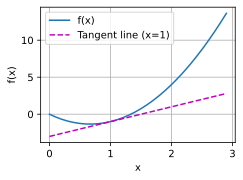

In [80]:
x = np.arange(0, 3, 0.1)
myutils.plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [81]:
x = torch.arange(4.0)
x.requires_grad_(True)
x.grad

In [82]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [84]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [85]:
z = 2 * torch.dot(x, x)
z.backward()
x.grad # gradient 累积

tensor([ 0.,  8., 16., 24.])

In [86]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [87]:
x = torch.tensor(1.0, requires_grad=True)
y1 = x ** 2 
with torch.no_grad():
    y2 = x ** 3
y3 = y1 + y2
    
print(x.requires_grad)
print(y1, y1.requires_grad) # True
print(y2, y2.requires_grad) # False
print(y3, y3.requires_grad) # True

True
tensor(1., grad_fn=<PowBackward0>) True
tensor(1.) False
tensor(2., grad_fn=<AddBackward0>) True


In [77]:
# Probability

In [88]:
from torch.distributions import multinomial

In [91]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [92]:
n = 100
multinomial.Multinomial(n, fair_probs).sample() / n

tensor([0.2200, 0.1500, 0.1500, 0.1900, 0.1800, 0.1100])

In [93]:
# 500 trials, 10 sample each trial
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)

In [97]:
cum_counts

tensor([[  2.,   3.,   2.,   1.,   0.,   2.],
        [  2.,   5.,   3.,   4.,   4.,   2.],
        [  4.,   6.,   4.,   6.,   7.,   3.],
        ...,
        [831., 832., 774., 800., 869., 874.],
        [831., 836., 777., 802., 870., 874.],
        [832., 838., 781., 803., 871., 875.]])

In [94]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

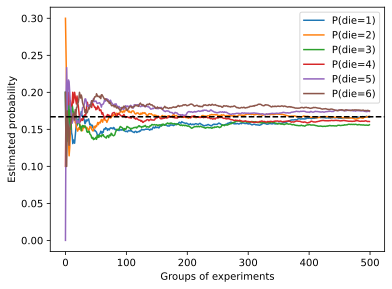

In [95]:
myutils.set_figsize((6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].numpy(),
        label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend();

In [89]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weibull', '__all__', '__builtins__', '__cached__', '__doc__'

In [90]:
help(torch.poisson)

Help on built-in function poisson:

poisson(...)
    poisson(input, generator=None) -> Tensor
    
    Returns a tensor of the same size as :attr:`input` with each element
    sampled from a Poisson distribution with rate parameter given by the corresponding
    element in :attr:`input` i.e.,
    
    .. math::
        \text{out}_i \sim \text{Poisson}(\text{input}_i)
    
    Args:
        input (Tensor): the input tensor containing the rates of the Poisson distribution
    
    Keyword args:
        generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
    
    Example::
    
        >>> rates = torch.rand(4, 4) * 5  # rate parameter between 0 and 5
        >>> torch.poisson(rates)
        tensor([[9., 1., 3., 5.],
                [8., 6., 6., 0.],
                [0., 4., 5., 3.],
                [2., 1., 4., 2.]])



In [100]:
# normal density distribution

def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

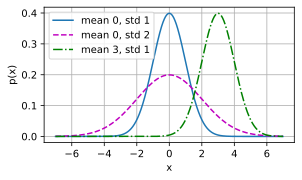

In [99]:
x = np.arange(-7, 7, 0.01)

params = [(0, 1), (0, 2), (3, 1)]
myutils.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
            ylabel='p(x)', figsize=(4.5, 2.5),
            legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [101]:
m = torch.distributions.bernoulli.Bernoulli(0.9)
m.sample()

tensor(1.)

In [52]:
#m = torch.distributions.beta.Beta(torch.tensor([0.5]), torch.tensor([0.5]))
#m.sample()

tensor([0.2716])

In [102]:
m = torch.distributions.binomial.Binomial(100, torch.tensor([0 , .2, .8, 1]))
print(m.sample())

m = torch.distributions.binomial.Binomial(100, torch.tensor([[0 , .2],[ .8, 1]]))
print(m.sample())

tensor([  0.,  17.,  81., 100.])
tensor([[  0.,  24.],
        [ 83., 100.]])


In [53]:
m = torch.distributions.normal.Normal(torch.tensor([0.0]), torch.tensor([1.0]))
m.sample()

tensor([-0.5354])

In [103]:
# most common two samplings
torch.randn(100) # standard normal
torch.rand(10) # [0,1] uniform

tensor([0.6181, 0.9115, 0.2236, 0.4462, 0.9966, 0.9174, 0.7968, 0.6041, 0.4345,
        0.5555])

In [37]:
# of course you can use numpy random generator 
np.random.rand(10)
np.random.randn(10)

array([ 0.50546113, -0.09695464, -2.69180047, -0.02662443, -0.79894769,
        3.00942278,  0.78886828,  0.4324865 ,  0.70320683,  1.84392772])

In [104]:
# sample from a list
np.random.choice(4,2,replace = False)

a = [5,8,10]
np.random.choice(a, 1)

array([8])

In [105]:
torch.tensor(np.random.exponential(1,100)) # array to tensor

tensor([1.6924e+00, 1.0709e+00, 6.2431e-01, 2.9390e+00, 2.4010e-02, 3.3172e-01,
        5.3445e-01, 5.4742e-01, 6.4235e-02, 5.3052e+00, 5.0035e-01, 3.1138e-01,
        2.6244e+00, 8.4640e-01, 9.0680e-02, 5.8004e-01, 2.4169e+00, 1.8548e+00,
        3.5439e-01, 2.6022e-01, 1.3365e-01, 3.1929e-01, 5.3043e-01, 1.5084e+00,
        1.8481e-01, 1.6169e-01, 4.3829e-02, 2.6510e-01, 2.6379e-01, 7.0807e-01,
        8.1746e-01, 3.3381e-01, 1.9414e+00, 1.0979e+00, 1.2117e+00, 2.8643e+00,
        4.1732e-01, 5.2884e-02, 9.0610e-02, 1.9001e-01, 1.3785e+00, 2.5038e+00,
        4.2017e-01, 2.5597e-01, 1.0179e-01, 4.2103e+00, 1.8721e-02, 5.0544e-03,
        2.1775e-01, 3.1548e-01, 1.2364e+00, 1.4158e-01, 1.1464e+00, 3.7969e-01,
        7.8305e-01, 1.5041e+00, 2.5077e+00, 2.8231e-01, 3.3339e-01, 2.7175e+00,
        1.2605e+00, 1.4808e+00, 1.2062e+00, 8.9024e-02, 1.1397e+00, 2.7502e+00,
        5.1377e-01, 1.0754e+00, 9.7445e-01, 3.9331e-01, 2.6058e+00, 1.4889e-01,
        3.4235e-01, 1.4423e-02, 2.0543e-

In [34]:
torch.linspace(0,1,10)

tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])

In [110]:
torch.arange(10)

torch.Size([10])

In [109]:
torch.arange(10)[-6:-1]

tensor(9)